In [1]:
#loading libraries
import os
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
os.chdir("C:/Users/vibhu/OneDrive/Desktop/VIT/SEM 3//Operating System//Project")
data = pd.read_csv("dataset.csv")
feature_name = ['real','user','sys']
target_names = ['uninfected','infected']

In [2]:
data.head()

,syscall_name,syscall_encoded,real,user,sys,infected
0,wait,1,11,10,1,0
1,wait,1,20,10,1,0
2,wait,1,24,10,1,0
3,wait,1,9,6,2,0
4,wait,1,11,7,4,0


In [3]:
x = data[feature_name]
y = data.infected

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [35]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=1,splitter='best', random_state=True)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [36]:
### Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.875


In [37]:
print(y_pred)

[1 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0
 1 0 1 0 0 1 1 0 1]


In [38]:
a = np.array(y_test)

In [39]:
b = np.array(y_pred)

In [40]:
confusion_matrix(a,b)

array([[50,  2],
       [13, 55]], dtype=int64)

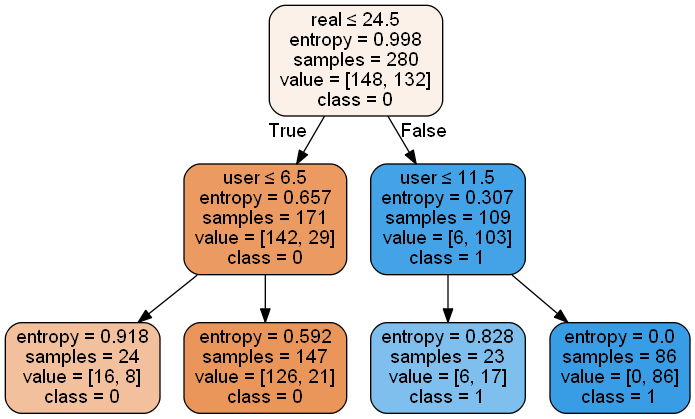

In [11]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_name,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('rootkit.png')
Image(graph.create_png())

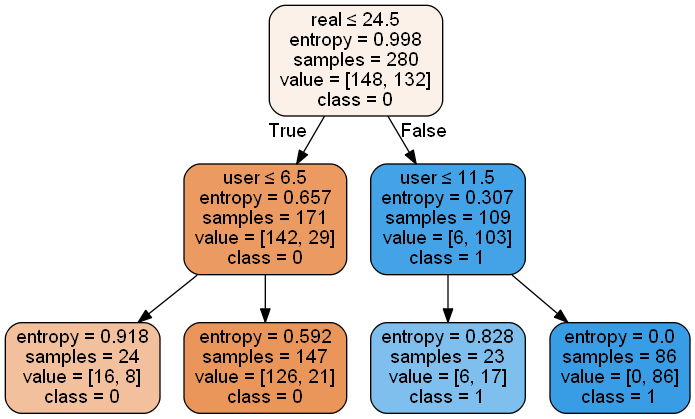

In [105]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_name,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())